In [1]:
import os
import sys
sys.path.append(r"C:\Users\cristhianroman\Documents\QuantumGRN")
import numpy as np
import pandas as pd

In [2]:
filename="../dataset/expr_matrix_pearsonresidual_7.txt"
df = pd.read_csv(filename, delimiter='\t')
df = df.set_index('genes').T
df.head()

genes,AICDA,IRF4,PAX5,PRDM1,REL,RELA
X1,-0.744255,-1.389371,0.869163,-0.639366,0.499583,-0.558294
X2,-0.574980,0.760179,1.470277,-0.493802,0.178566,-0.431103
X3,-0.756529,0.670392,5.327456,-0.649925,1.276864,1.188840
X4,1.000327,-1.152912,-0.541244,-0.529274,0.039775,-0.462092
X5,-0.505078,-0.946417,-0.443544,-0.433726,-0.800315,-0.378630


In [3]:
from qscgrn import *

ncells, ngenes = df.shape
df = qsc_order_gene(df)
genes = df.columns.to_list()
p_obs = qsc_distribution(df)
activation = qsc_activation_ratios(df)

2022-07-04 14:56:13 | I | The dataframe genes are ordered
2022-07-04 14:56:13 | I | The observed probability `p_obs` is calculated
2022-07-04 14:56:13 | I | Activation ratios are computed


2022-07-04 14:56:13 | I | Plotting the Observed distribution in a barplot and exporting to 01_p_obs.svg file.


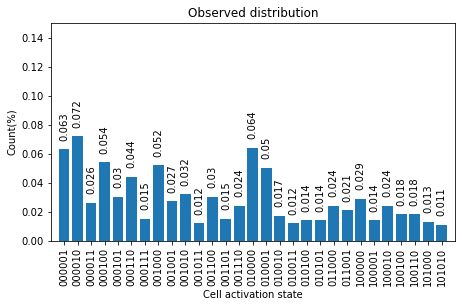

In [4]:
mask = mini_hist(ngenes, p_obs, limit=0.01, ymax=0.15,
                 title="Observed distribution",
                 filename="01_p_obs.svg")

In [5]:
theta = theta_init(genes, activation_ratios=activation)
edges = edges_init(genes)
qgrn = model(ncells, genes, theta, edges, p_obs, epochs=100, save_theta=True)

2022-07-04 14:56:13 | I | Theta series is initialized using zeros as method with activation values
2022-07-04 14:56:13 | I | Edges for the QuantumGRN and quantum circuit are created for 6 genes
2022-07-04 14:56:13 | I | The QuantumGRN model is been initialized with 6 genes and 28208 cells


In [6]:
qgrn.train()

2022-07-04 14:56:13 | I | Starting the optimization for the QuantumGRN
100/100 [==================================================] - 5s 49ms/step
2022-07-04 14:56:18 | I | Optimization completed!!.. Due to the number of epochs reached


In [7]:
p_out = qgrn.p_out.reshape(2**ngenes,)

2022-07-04 14:56:18 | I | Plotting the Comparison of distributions in a barplot and exporting to 01_comparison.svg file.


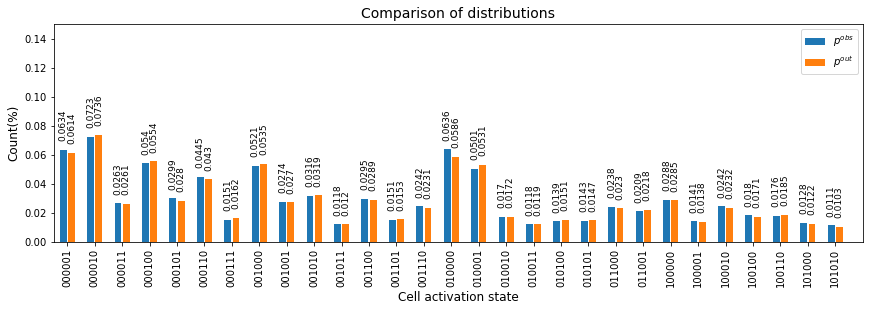

In [8]:
comparison_hist(ngenes, p_obs, p_out, limit=0.01, ymax=0.15, mask=mask,
                filename="01_comparison.svg")

In [9]:
draw_network(genes, edges, qgrn.theta, filename="01_qgrn_network.svg")

2022-07-04 14:56:19 | I | Drawing the network representation of the qscGRN model and exporting to 01_qgrn_network.svg file.


In [10]:
qgrn.export_training_theta("01_evo_theta.csv")

2022-07-04 14:56:19 | I | Theta values during optimization are exported to 01_evo_theta.csv
